In [3]:
import MDAnalysis
from MDAnalysis import Universe
u = Universe('OPEN.pdb','OPEN.xtc')

In [4]:
print (u.atoms)
import MDAnalysis.analysis.pca as pca
pc= pca.PCA(u, select='backbone',n_components=10)
pc.run()

<AtomGroup [<Atom 1: CA of type C of resname LEU, resid 1 and segid A and altLoc >, <Atom 2: CA of type C of resname ASN, resid 2 and segid A and altLoc >, <Atom 3: CA of type C of resname LEU, resid 3 and segid A and altLoc >, ..., <Atom 1746: CA of type C of resname LYS, resid 1746 and segid B and altLoc >, <Atom 1747: CA of type C of resname TRP, resid 1747 and segid B and altLoc >, <Atom 1748: CA of type C of resname VAL, resid 1748 and segid B and altLoc >]>


In [5]:
import numpy as np
n_pcs = np.where(pc.cumulated_variance > 0.94)[0][0]
atomgroup = u.select_atoms('backbone')
pca_space = pc.transform(atomgroup, n_components=n_pcs)

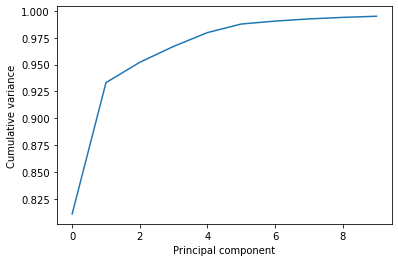

In [6]:
import matplotlib.pyplot as plt
plt.plot(pc.cumulated_variance[:10])
plt.xlabel('Principal component')
plt.ylabel('Cumulative variance');

In [7]:
print(pca_space.shape)

(5172, 2)


In [8]:
print(pc.cumulated_variance)

[0.81086284 0.93320438 0.9521475  0.96695343 0.97979445 0.98777607
 0.99051385 0.99254255 0.99395119 0.99502575]


In [9]:
transformed = pc.transform(atomgroup, n_components=5)
PC1=transformed[:,0]
PC2=transformed[:,1]
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

print(PC2)

[ 3.65219543e+02  4.72013606e+02  3.41675033e+02  3.29914743e+02
  3.79342418e+02  3.67390956e+02  3.53948637e+02  3.72768594e+02
  4.14560651e+02  4.14703577e+02  4.07643518e+02  4.05036730e+02
  4.17833898e+02  4.48406524e+02  4.36369711e+02  4.60676238e+02
  4.28312522e+02  4.44120572e+02  4.71858670e+02  4.76342597e+02
  4.62896035e+02  3.91642070e+02  4.32508894e+02  4.54022586e+02
  4.40316362e+02  4.48798202e+02  4.48465051e+02  4.45257593e+02
  4.44358850e+02  4.79712960e+02  5.09649927e+02  5.13634756e+02
  5.20282197e+02  5.20470324e+02  5.02185467e+02  5.20071246e+02
  5.01082422e+02  5.53342033e+02  5.45408080e+02  6.76054600e+02
  5.13713454e+02  5.24004977e+02  5.12185080e+02  5.27956201e+02
  5.02478245e+02  4.84787730e+02  4.94531689e+02  5.12218096e+02
  4.84581241e+02  4.56429338e+02  4.41912655e+02  4.30121516e+02
  4.36506616e+02  4.54113372e+02  4.75102727e+02  4.91421524e+02
  4.37086197e+02  4.05598499e+02  3.32614371e+02  3.73717615e+02
  4.34407945e+02  4.21014

In [11]:
import pandas as pd
df = pd.DataFrame(transformed,
columns=['PC{}'.format(i+1) for i in range(5)])
df['Time (ns)'] = df.index * u.trajectory.dt *0.001  #dt is in ps its value is 100ps we convert it to ns using 0.001 then dt becomes 0.1 ns so to get 100 ns we multiply 1000
print(u.trajectory.dt*0.001)
# print(df['Time (ns)'])
# df.head()
data=np.column_stack([PC1, PC2,df['Time (ns)']])
datafile_path = "/Users/nidhisoley/Desktop/RA-SCI/open/dataopen.txt"
np.savetxt(datafile_path , data, fmt=['%0.4f','%0.4f','%0.4f'])

0.1


/Users/nidhisoley/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


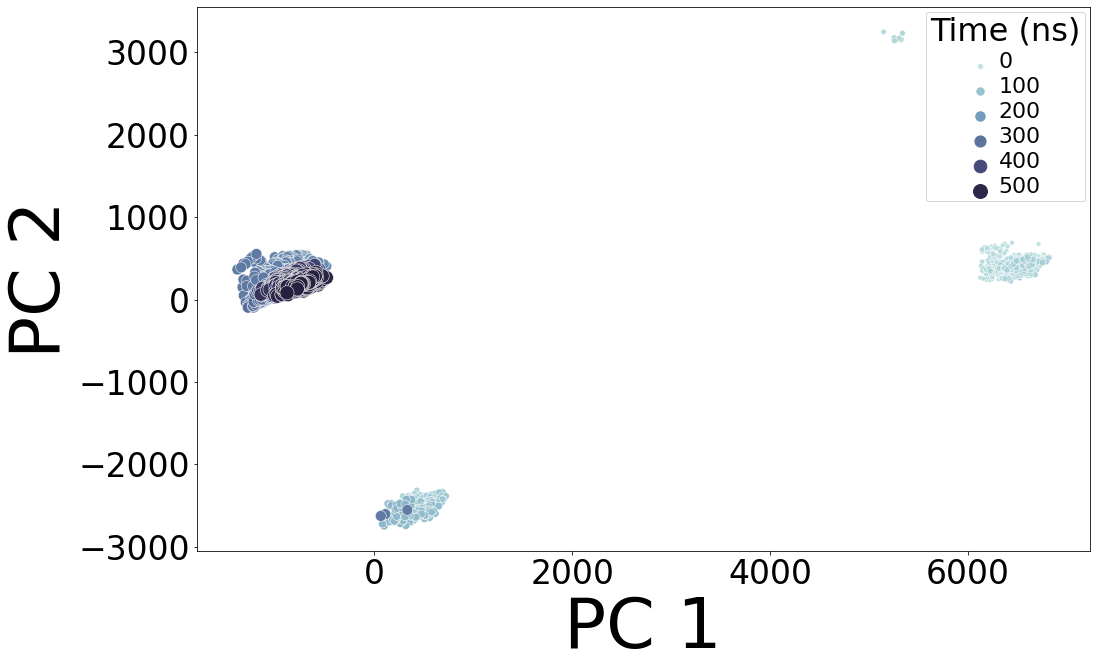

In [13]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 70)
ax.set_ylabel('PC 2', fontsize = 70)
#ax.set_title('Plot of 1st Two Principal Components', fontsize = 30)
# Create as many colors as there are unique midwest['category']
import seaborn as sns
g =sns.scatterplot(PC1, PC2,
              hue='Time (ns)',
              data=df,size="Time (ns)",sizes=(20, 200),palette="ch:start=.2,rot=-.3");
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

# ax.scatter(PC1, PC2, s = 50,c='Time (s)')
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
#ax.grid()
plt.savefig('/Users/nidhisoley/Desktop/RA-SCI/open/openpca.png',bbox_inches="tight")

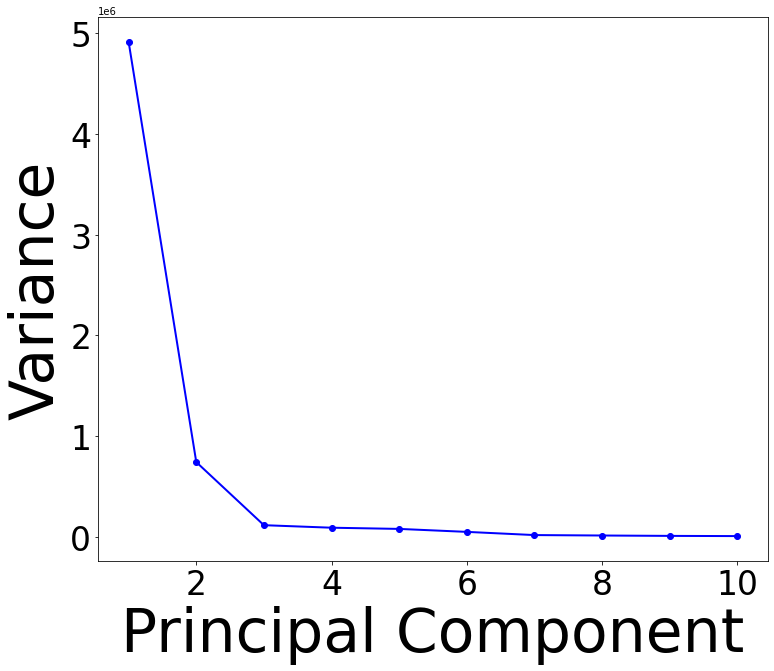

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,10))
PC_values = np.arange(pc.n_components) + 1
ax=plt.plot(PC_values, pc.variance, 'ro-', linewidth=2,color="blue")
plt.xlabel('Principal Component', fontsize = 60)
plt.ylabel('Variance', fontsize = 60)
#plt.title('Scree Plot', fontsize = 40)
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
plt.savefig('/Users/nidhisoley/Desktop/RA-SCI/open/openscree.png',bbox_inches="tight")
plt.show()


In [8]:
pc.variance

array([208338.26014155, 109277.51071041,  79058.66993882,  55579.48550782,
        31833.26171773,  20064.18892489,  13981.62015031,   7167.05861626,
         6259.24372981,   4665.03651701])